## Exercício - Titanic
disponível em https://www.kaggle.com/c/titanic/overview

#### Descrição
O naufrágio do RMS Titanic é um dos naufrágios mais famosos da história. Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic afundou após colidir com um iceberg, matando 1502 de 2224 passageiros e tripulantes. Essa tragédia chocou a comunidade internacional e levou a melhores regulamentações de segurança para os navios.

Uma das razões pelas quais o naufrágio levou a tal perda de vidas foi que não havia botes salva-vidas suficientes para os passageiros e a tripulação. Embora houvesse algum elemento de sorte envolvido na sobrevivência do naufrágio, alguns grupos de pessoas eram mais propensos a sobreviver do que outros, como mulheres, crianças e a classe alta.

Nesse desafio, a atividade é que você conclua a análise de que tipo de pessoa provavelmente sobreviverá. Em particular, solicitamos você deve aplicar classificadores de árvores de decisão para esta atividade.


### Descrição do dataset
Os dados foram divididos em dois grupos:

conjunto de treinamento (train.csv)
conjunto de teste (test.csv)
O conjunto de treinamento deve ser usado para criar seus modelos de aprendizado de máquina. Para o conjunto de treinamento, fornecemos o resultado (também conhecido como "verdade do solo") para cada passageiro. Seu modelo será baseado em "atributos", como sexo e classe dos passageiros. Você também pode usar a engenharia de atributos para criar novos atributos.

Parte do conjunto de treino deve ser usado para ver o desempenho do seu modelo em dados não vistos. 

Para o conjunto de testes, não é fornecido o rótulo de classe para cada passageiro. É seu trabalho prever esses resultados. Para cada passageiro no conjunto de testes, use o modelo que você treinou para prever se eles sobreviveram ou não ao naufrágio do Titanic. O resultado deve ser submetido na plataforma Kaggle (opção **submit predictions**) a fim de calcular a acurácia. 

Também incluímos gender_submission.csv, um conjunto de previsões que supõem que todas e apenas passageiras sobrevivem, como um exemplo da aparência de um arquivo de envio.

### Dicionário de Dados

**Variable -	Definition	- Key**

survival - Survival	- 0 = No, 1 = Yes

pclass -	Ticket class -	1 = 1st, 2 = 2nd, 3 = 3rd

sex -	Sex	

Age	- Age in years	

sibsp -	# of siblings / spouses aboard the Titanic	

parch- # of parents / children aboard the Titanic	

ticket - Ticket number	

fare - Passenger fare	

cabin- Cabin number	

embarked- Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np

### Load dataset

In [12]:
# Load train dataset
x_train_data = pd.read_csv('titanic/train.csv')
x_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# Load test dataset
test_data = pd.read_csv('titanic/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Data Cleaning

In [49]:
# Remove lines with missing values in the column Embarked
x_train_data = x_train_data.dropna(subset=['Embarked'])
x_test_data = test_data.dropna(subset=['Embarked'])

## Extract the target variable

In [50]:
# Extract the target variable
y_train_data = x_train_data.Survived

## Exploratory Data Analysis - Check the ratio of survived and not survived passengers by sex

In [51]:
# Percentage of women
women = x_train_data.loc[x_train_data.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)

print("% of women how survived:", rate_women)

% of women how survived: 0.7403846153846154


In [52]:
# Percentage of men
men = x_train_data.loc[x_train_data.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)

print("% of men how survived:", rate_men)

% of men how survived: 0.18890814558058924


## Import Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Preprocessing

In [57]:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
X = pd.get_dummies(x_train_data[features])
X_test = pd.get_dummies(test_data[features])
X.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,0,1,0,0,1
1,1,1,0,1,0,1,0,0
2,3,0,0,1,0,0,0,1
3,1,1,0,1,0,0,0,1
4,3,0,0,0,1,0,0,1


## Train model

In [58]:
# Train model
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X, y_train_data)
y_pred = model.predict(X_test)

## Show tree

[Text(0.45982142857142855, 0.9166666666666666, 'x[4] <= 0.5\ngini = 0.472\nsamples = 889\nvalue = [549, 340]'),
 Text(0.20535714285714285, 0.75, 'x[0] <= 2.5\ngini = 0.384\nsamples = 312\nvalue = [81, 231]'),
 Text(0.09821428571428571, 0.5833333333333334, 'x[7] <= 0.5\ngini = 0.101\nsamples = 168\nvalue = [9, 159]'),
 Text(0.05357142857142857, 0.4166666666666667, 'x[1] <= 0.5\ngini = 0.037\nsamples = 53\nvalue = [1, 52]'),
 Text(0.03571428571428571, 0.25, 'x[2] <= 0.5\ngini = 0.071\nsamples = 27\nvalue = [1, 26]'),
 Text(0.017857142857142856, 0.08333333333333333, 'gini = 0.087\nsamples = 22\nvalue = [1, 21]'),
 Text(0.05357142857142857, 0.08333333333333333, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.07142857142857142, 0.25, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(0.14285714285714285, 0.4166666666666667, 'x[1] <= 0.5\ngini = 0.129\nsamples = 115\nvalue = [8, 107]'),
 Text(0.10714285714285714, 0.25, 'x[0] <= 1.5\ngini = 0.089\nsamples = 64\nvalue = [3, 61]'),
 Text(0

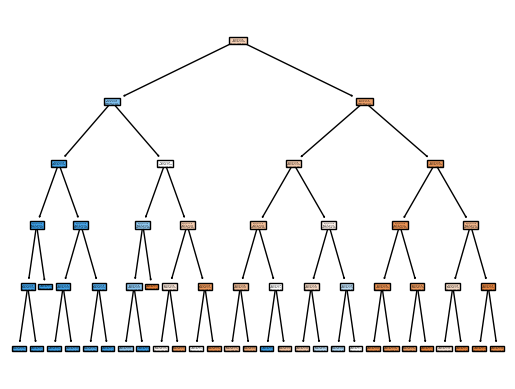

In [59]:
# Show tree
tree.plot_tree(model, filled=True)

## Show accuracy

In [61]:
# Show accuracy
print("Accuracy:", accuracy_score(y_train_data, model.predict(X)))

Accuracy: 0.8166479190101237


In [62]:
# Show confusion matrix
print("Confusion matrix:\n", confusion_matrix(y_train_data, model.predict(X)))

Confusion matrix:
 [[519  30]
 [133 207]]


## Export tree with graphviz

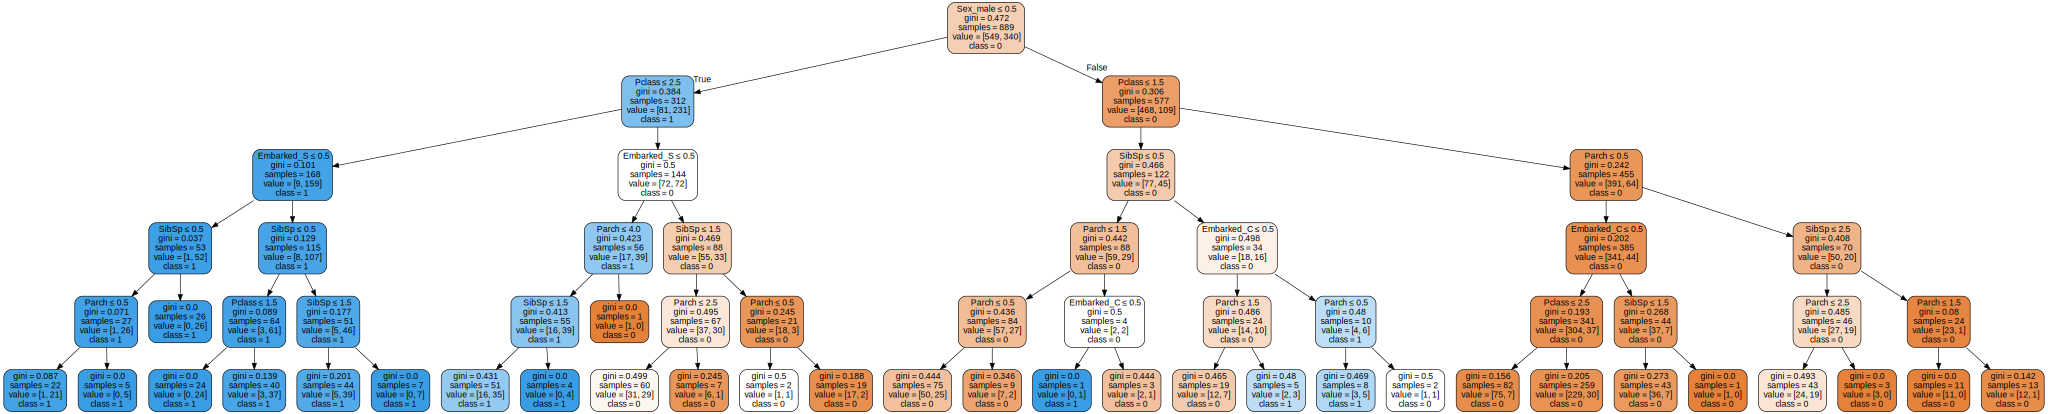

In [64]:
# Export tree with graphviz
import graphviz
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=X.columns,
                                class_names=['0', '1'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [67]:
# export tree to pdf
pdf = graph.pipe(format='pdf')
with open("tree.pdf", "wb") as f:
    f.write(pdf)